# Machine Learning Tutorial
    Author:    Theodora Tataru
               C00231174
    Tutor:     Greg Doyle
    Course:    Software Development, 4th year
    Institute: Institute of Technology Carlow
    Year:      2020

### This is tutorial focuses on various preprocessing data techniques and algorithms
#### Artificial Intelligence
   1. <a href="#AI"> Artificial Intelligence </a>
   2. <a href="#tools"> Tools </a>
   3. <a href="#techniques"> Techniques </a>
   4. <a href="#?"> ? </a>
   5. <a href="#?"> ? </a>
   
#### Pre-processing data methods:
   1. <a href="#missing_data"> Missing data </a>

#### Machine Learning Algorithms:
   1. <a href="#CNN">Neural Network</a>
   2. <a href ="#decision_tree"> Decision Tree </a>
   3. Random Forest
   4. Linear Regression
   5. Reinforcement
    
(will be filled more later) 



# Introduction

This tutorial is designed to tackle different aspects of Machine Learning, such as pre-processing data, machine learning algorithms - training, testing and predictions.
The tutorial aims to explain some different algorithms used in pre-processing data machine learning models.

# Requirements

Before starting this tutorial, few requirements need to be satisfied:
   1. Python knowledge is required
   2. The following need to be installed on the system:
       #### Python 3
       <code> sudo apt-get install python3.8 </code>
       #### Tensorflow
       <code> python3 -m pip install tensorflow </code>
       #### Keras
       <code> sudo apt-get install keras </code>
       #### Matplotlib
       <code> python3 -m pip install mathplotlib </code>
       #### NumPy
       <code> python3 -m pip install numpy </code>
       #### Pands
       <code> python3 -m pip install pands </code>

<a id="AI"> </a>
# Artificial Intelligence

In this section, several aspects of machine learning are described at a high-level. Reading this section is extremely important for a clear understanding of the algorithms explained above.

Artificial Intelligence is the intelligence implemented into machines. This ability can be gained by performing
statistical operations on data.
To start the learning progress of the AI, a collection of data is be fed to the system as learning data points. The
data fed to the AI needs to be accurate and clean – from any unnecessary information. This data is the single
source of knowledge of AI and is the base of Artificial Intelligence.
There are many ways AI can learn, and the most popular ways are: Machine Learning and Deep Learning.
The human brain is programmed by the DNA that defines neural structures. These structures inside change the path
of neural activity and organism behavior as a result of our experiences.
There are several ways to simulate these learning mechanisms in computers [49].
For learning to happen in both flash and silicon matter, the following are needed:
    - A way for the system to understand what is expected of it
    - A way for the system to remember the information needed
    - A way for the system to input information
    - A way for the system to output information
    - A way to load algorithms into the system
    - Physical matter (hardware for machines) to support all the above bullet points.

Since the beginning of AI, the learning system has shifted from algorithms that rely on logic and rules to
machine learning, in which case the algorithms contain fewer rules and absorb training data points to learn, as
humans, by trial and error. 
![alt text](AiEvolution.png "Title")

Thanks to powerful computers and big data, Machine Learning has now advanced algorithms called neural
networks. These networks are just a collection of computing fundamentals shaped like the neurons in the human
brain, that build stronger or weaker links as they assimilate data [50].
This is very important, as humans, do not recognize a dog by definitions like "if (number of legs==4, and
tail==true, size>cat, color==" brown or white or black)". If this was the case, we would not be able to recognize
a Chikwawa with 3 legs, as a dog. The goal is to make AI think and acknowledge reality as much as possible
as close to humans. 

Machine learning is a part of Artificial Intelligence, that contributes with the ability to allow a machine to learn
and improve from input data. Machine learning focuses on the development of computer programs that can
access data and use it for learning.
Machine learning uses two approaches to train a model :
     - Supervised learning, which ingests a set of input data that describes explicitly what the machine should
focus on. These data points fed to the machine are labeled
    - Unsupervised learning does not feed the AI with labeled data points. In this model, the machine is
supposed to organize data on its own, based on the features of the inserted data
Usually, the supervised learning is used when the AI model is used to make a prediction, while the unsupervised
learning model is used when data needs to be explored.
Machine learning gives a system the ability to learn automatically and improve from experience, without
being precisely programmed or without any human interaction. 

Following, in this section, we have a high-level look at how data is pre-processed, what algorithms are mostly used and how the training and the testing steps are achieved. In later sections, some actions are implemented and explained using Python3.


## There are 3 main Machine Learning Algorithms:
![alt text](ML_algorithms.png "Title")
   ### 1. Supervised Learning
   The supervised machine learning algorithms use labeled data to learn how the mapping function works to map the input variable with the out variable. The supervised learning algorithm consists in several types of supervised learning, but we will focus on two main types:
   #### Classification: 
   It is used to predict the outcome of input data based on cathegories, that the model was trained to recognize.

   #### Regression:
   It is used to predict the outcome of a input data when the output variable is in the form of real values.

    
   ### 2. Unsupervised Learning
   The unsupervised machine learning algorithms are used when the model is fed with input data and the model itself needs to organize data on its own, based on patterns and features of the inserted data.
   Again, there are several types of unsupervised machine learning models, but we will focus on the two main types:
   #### Association
   It is used to discover relations between input variables. It is highly used in the market analysis as it easily computes the probability of the co-occurrence of items in a collection.
   #### Clustering
   is used to group the input data as similarities are found.
    
   ### 3. Reinforcement Learning:
   Reinforcement learning is a different type of algorithm, that is designed to allow an agent to predict the best next move. The decision is based on the agent's current state and by learning behaviors that maximaze, it's reward.

<a id="tools"> </a>
# Tools
    - python
    - tensorflow
    - keras
    - numpy
    - matplotlib
    - pands
    (This is gonna be filled later)

<a id="techniques"> </a>
# Techniques
(filled later)

## Data pre-processing
This tutorial demonstrates different techniques for pre-processing data.
In this part of the tutorial, the following pre-processing methods:
    - data cleaning
        - handle missing data
        - handle noisy data
        - binning data for data smoothing
    - data integration and transformation
        - handle duplicate data
        - data integration
    - data reduction
        - cube aggregation

<a id="missing_data"></a>
## Data cleaning - Missing data

### Packages needed:
    - Python 3
    - Pandas
    - NumPy
    - Scikit-Learn
### Overview
#### Dataset: Diabetes dataset [1]
    - Diabetes Dataset
    - Has missing values: YES
    - Source: National Institute of Diabetes and Digestive Kidney Diseases
    - Date: 1990
    - Number of instances: 768
    - Number of attributes: 8+
           1. Number of times pregnant
           2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
           3. Diastolic blood pressure (mm Hg)
           4. Triceps skinfold thickness (mm)
           5. 2-Hour serum insulin (mu U/ml)
           6. Body mass index (weight in kg/(height in m)^2)
           7. Diabetes pedigree function
           8. Age (years)
           9. Class variable (0 or 1)
#### Process [1]:
   - mark missing values
   - remove rows with missing values
   - replace missing values
   - use algorithms that support missing values

  

In [1]:
## Mark Missing values
from pandas import read_csv ## used to load the dataset
dataset = read_csv('pima-indians-diabetes.csv') ## load the data set from harddisk
print(dataset) ## print the summary of the dataset, to see missing values

      6  148  72  35    0  33.6  0.627  50  1
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
..   ..  ...  ..  ..  ...   ...    ...  .. ..
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0

[767 rows x 9 columns]


Missing data can be represented by out-of-range values. In a numeric field where values should be positive, missing data can be represented by 0 or negative numbers [1].

In [2]:
## usingPanda DataFrame, we can print the dataset summary statistics on each field
print(dataset.describe())

                6         148          72          35           0        33.6  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean     3.842243  120.859192   69.101695   20.517601   79.903520   31.990482   
std      3.370877   31.978468   19.368155   15.954059  115.283105    7.889091   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   32.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  127.500000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

            0.627          50           1  
count  767.000000  767.000000  767.000000  
mean     0.471674   33.219035    0.348110  
std      0.331497   11.752296    0.476682  
min      0.078000   21.000000    0.000000  
25%      0.243500   24.000000    0.000000  
50%   

As seen in the above line, there are fields that have a minimum value of zero. On some columns, the value of zero does not make sense and indicates that their values are missing [1].

Columns with missing values:

    1: Plasma glucose concentration
    2: Diastolic blood pressure
    3: Triceps skinfold thickness
    4: 2-Hour serum insulin
    5: Body mass index


In [3]:
## We can confirm the missing values, by analyzing the raw data. Therefore, we will print the first 10 rows of the dataset
print(dataset.head(10))

    6  148  72  35    0  33.6  0.627  50  1
0   1   85  66  29    0  26.6  0.351  31  0
1   8  183  64   0    0  23.3  0.672  32  1
2   1   89  66  23   94  28.1  0.167  21  0
3   0  137  40  35  168  43.1  2.288  33  1
4   5  116  74   0    0  25.6  0.201  30  0
5   3   78  50  32   88  31.0  0.248  26  1
6  10  115   0   0    0  35.3  0.134  29  0
7   2  197  70  45  543  30.5  0.158  53  1
8   8  125  96   0    0   0.0  0.232  54  1
9   4  110  92   0    0  37.6  0.191  30  0


To simplify things, we can print the count of the number of missing values on each column. 
For better visualization, we will mark all missing values as "True", and then, we can count the the "True" values for each column [1].

In [4]:
dataset = read_csv('pima-indians-diabetes.csv', header=None)
## count the number of missing values from all 5 columns
missing = (dataset[[0,1,2,3,4,5,6,7,8]] == 0).sum()
print(missing)

0    111
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8    500
dtype: int64


It can be seen that columns 1, 2 and 5 has few missing value, while column 3, 4 and 8 have many missing values.
In Python, missing values are usually marked as NaN. This values Nan are ignored when operations are performed [1].

In [5]:
from numpy import nan
## replacing all zero values by nan in the dataset
dataset[[0,1,2,3,4,5,6,7,8]] = dataset[[0,1,2,3,4,5,6,7,8]].replace(0,nan)
print(dataset.isnull().sum())

0    111
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8    500
dtype: int64


As the sum of counting the zeros in the dayaset, matches the counting when using nan, confirms that we marked and identified the missing values correctly. 

In [6]:
## confirming that the zero values were replaced by NaN
print(dataset.head(10))

      0      1     2     3      4     5      6   7    8
0   6.0  148.0  72.0  35.0    NaN  33.6  0.627  50  1.0
1   1.0   85.0  66.0  29.0    NaN  26.6  0.351  31  NaN
2   8.0  183.0  64.0   NaN    NaN  23.3  0.672  32  1.0
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21  NaN
4   NaN  137.0  40.0  35.0  168.0  43.1  2.288  33  1.0
5   5.0  116.0  74.0   NaN    NaN  25.6  0.201  30  NaN
6   3.0   78.0  50.0  32.0   88.0  31.0  0.248  26  1.0
7  10.0  115.0   NaN   NaN    NaN  35.3  0.134  29  NaN
8   2.0  197.0  70.0  45.0  543.0  30.5  0.158  53  1.0
9   8.0  125.0  96.0   NaN    NaN   NaN  0.232  54  1.0


Having missing values in a training dataset can cause errors in the machine learning algorithms and lead to erroneous predictions.
It is essential to handle the missing data prior to developing the model and the training process.

#### Removing the missing values
The easiest and simplistic strategy to handle the missing data is to remove all records containing missing data.
To achieve this, a new Panda DataFrame can be created with the rows containing the missing values removed.
Pandas provide a function dropna(), that can be used to remove columns or rows with missing data. In our example, we will use this function to remove all wors that contain missing data [1].

In [7]:
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the shape of the raw data
print(dataset.shape)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# drop rows with missing values
dataset.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(dataset.shape)

(768, 9)
(392, 9)


The output of the code above:
    - the first row shows the initial number of rows contained in the dataset
    - the second row shows the remaining number of rows that do not contain missing data.

Now that the data had been cleaned for missing values, an algorithm sensitive to missing data can be used to determine the accuracy that can be obtained with the remaining data [1]. 
#### Latent Dirichlet Allocation (LDA) 
LDA is an unsupervised learning algorithm that views data as words and works on making a key assumption [2].

Running this algorithm, the output might vary, given the nature of the algorithm. The algorithm should be executed a few times in a row and compute the average outcome to determine the average accuracy that the data can provide [2].


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.781


The approach presented above, which implies the deletion of all rows containing missing values, can limit the model's prediction. Therefore, new methods of dealing with missing values will be detailed below [1].

#### Impute Missing Values
This method implies the replacement of missing values, and there are many ways of replacing missing values, such as:
Replacing a missing value with:
    1. a constant value that has meaning 
    2. a random value from another record
    3. a mean, median or mode value for that column
    4. a value estimated by another predictive value
Each option presented above will have a different impact on the model, and on the predictions, the model will produce. 
Pandas, provide a function called fillna(), that replaces missing values with a specific value [1].
##### Replacing missing values with the mean of the column.
This function allows the developer to specify the value that replaces the missing value and the technique used to replace it [1].
The Pipeline is used to define the modeling pipeline, where data is primarly passed through the SimpleImputer to be transformed,  and only after fed to the model [1]. 

In [9]:
# example of evaluating a model after an imputer transform
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')
# define the model
lda = LinearDiscriminantAnalysis()
# define the modeling pipeline
pipeline = Pipeline(steps=[('imputer', imputer),('model', lda)])
# define the cross validation procedure
kfold = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.762


Let's compare the accuracy from the LDA algorithm that removes the rows with missing values and the accuracy of the model that replaced the missing values with the column's mean. We can observe that accuracy had decreased.
Try replacing the missing values with other values and compare the results again. For a more detailed example of imputing missing values, check this tutorial: https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/

# Machine Learning Algorithms

## A high level understanding of machine learning algorithms

<a id="CNN"> </a>
## Convolutional Neural Networks

This tutorial will guide step by step into the training and testing CNN model to classify images. Keras Sequential API is used for this model to create and train the model [3].

<b>Sequential API</b> allows the developers of the model to arrange the layers in sequential order, meaning that the flow of data is processed only in one direction. The disadvantage is that this sequential model does not allow us to build a model with multiple inputs and outputs. 

#### Requirements

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import datasets, layers, models

In [11]:
#This method will mark the start and the end of the training and testing the models
def date_and_time_now():
    import datetime
    now = datetime.datetime.now()
    return now.strftime("%Y-%m-%d %H:%M:%S")

#### Dataset
The <b>cifar-10</b> image dataset is composed of 60,000 colored images, with a size 32x32 and 10 labels. Each class contains 6,000 images. 
From the whole set of 60,000 images, 50,000 will be used for training and 10,000 for testing. The classes are unique, and there is no overlap in between them [3].

In [12]:
# downloading the data and dividing it into the training and testing set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Normalizing the pixel values from 255-0 to 1-0. This step is performed to facilitate the training process's speed, as large values can disrupt or slow down the process learning process. It is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### Verify the data

In [14]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

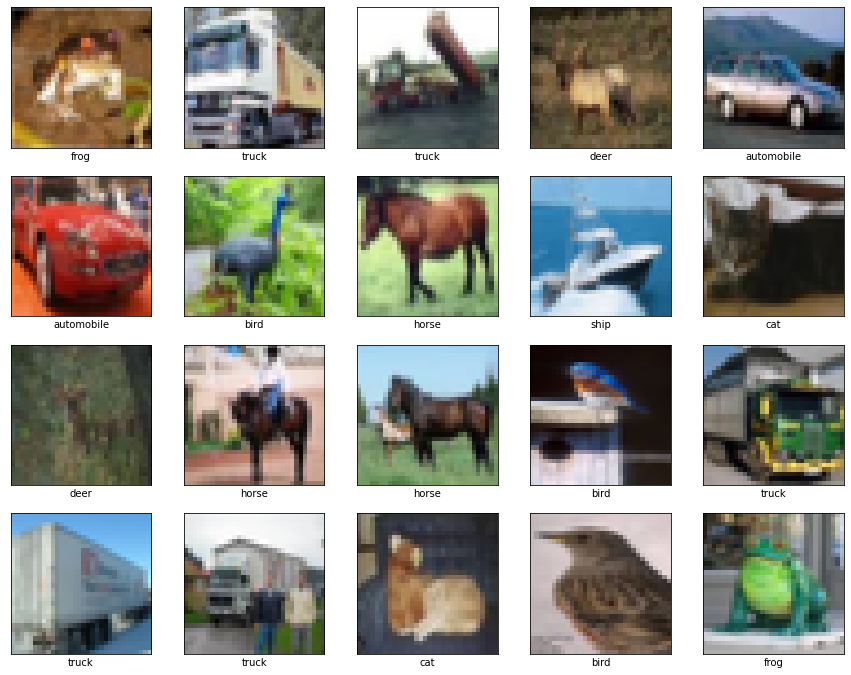

In [15]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i][0]])
plt.show()

#### Creating the sequential model

   - <b>Con2D</b> is the input layer that creates a convolutional kernel that feeds its input to the next available layer. The input images are RGB(colored) images with 32x32 dimensions. "relu" is a function that outputs the input directly to the next layer if it is positive, or in case it is negative, outputs 0.
   - <b>MaxPooling2D</b> layer reduces the dimension of images by reducing the number of pixels in the output from the previous layer.
   - <b>Flatten</b> layer is converting the data from a multi-dimensional array to a 1 dimension array. The reason for using this layer is to create a single long feature vector.
   - <b>Dense</b> layer is special, it is fully connected with the previous layer; in other words, this layer's neurons are all connected with every neuron of the previous layer.

In [16]:
def define_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    return model

Sumarize the arhitecture of the model:

In [17]:
model = define_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

As seen above, the images are shrinking as they are going deeper into the model, this is done so that the model can perform computationally more output channels in each Conv2D layer.

To complete the model, the last two layers, called Dense, perform the classification. These layers take vectors as input from the Flatten layer.

#### Compile the model - Training process
Compiling parameters:
   - <b>optimizers</b> [9] 
       - <b>adam</b> is an algorithm, one of the most popular used in CNNs, used in computer vision and natural language processing. The optimizer is computationally efficient and requires little memory to perform. It is appropriate for problems with noisy gradients
       - <b>adagrad</b> is an algorithm for gradient-based optimization that adapts the learning rate to the parameters, performing small updates where suitable
       - <b>adadelta</b> is an extension of <b>adagrad</b> that is less agressive, decreasing the learning rate.
       - <b>RMSprp</b> is an adaptive learning algorithm that divides the learning rate by exponentially decaying the average of squared gradients
       - <b>adamax</b> is an algorithm that updates the scaling rule inverse proportionally to the norm of the past gradients and current gradients
       - <b>nadam</b> can be seen as a combination of Adam and NAG algorithms
       - More details on https://ruder.io/optimizing-gradient-descent/index.html#momentum
   - <b>loss</b> is calculate as a difference between predictions and the true labels. The value of loss shows how poorly or well the model behaves during training

In [18]:
def compile_model():
    models = {}
    optimizers = ["adam", "adamax", "adagrad", "adadelta",  "RMSprop", "nadam"]
    for opt in optimizers:
        print("_________________________________________________________________________________________________________________")
        print("----->Training the model with:", opt, "oprimizer")
        model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
        history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

        #################################################################################################################
        # Evaluate the training process
        print("----->Evaluation of the training process for:", opt)
        plt.plot(history.history['accuracy'], label='accuracy')
        plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title(opt)
        plt.ylim([0.5, 1])
        plt.legend(loc='lower right')
        plt.show()

        #################################################################################################################
        # testing the model
        test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
        print('----->Test accuracy for', opt, ':', test_acc)

        #################################################################################################################
        # predictions
        print("----->Prediction for:", opt)
        predictions = model.predict(test_images)
        import numpy as np

        COLOR = 'white'
        plt.rcParams['text.color'] = COLOR
        plt.rcParams['axes.labelcolor'] = COLOR
        def predict(model, image, correct_label):
            classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                       'dog', 'frog', 'horse', 'ship', 'truck']
            prediction = model.predict(np.array([image]))
            predicted_class = classes[np.argmax(prediction)]
            show_image(image, classes[correct_label], predicted_class)
        def show_image(img, label, guess):
            plt.figure()
            plt.imshow(img, cmap=plt.cm.binary)
            print("Expected: " + label)
            print("Guess: " + guess)
            plt.colorbar()
            plt.grid(False)
            plt.show()
        
        import random
        num = random.randint(1,10000)
        image = test_images[num]
        label = test_labels[num][0]
        predict(model, image, label)
        
        models[opt] = model
    return models

In [19]:
# marking the start of the process of the simple model
start_simple_model = date_and_time_now()

_________________________________________________________________________________________________________________
----->Training the model with: adam oprimizer
Epoch 1/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.8199 - accuracy: 0.3239 - val_loss: 1.3116 - val_accuracy: 0.5197
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.2507 - accuracy: 0.5510 - val_loss: 1.1402 - val_accuracy: 0.5945
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0737 - accuracy: 0.6190 - val_loss: 1.0527 - val_accuracy: 0.6304
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9528 - accuracy: 0.6610 - val_loss: 0.9883 - val_accuracy: 0.6563
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8800 - accuracy: 0.6881 - val_loss: 0.9343 - val_accuracy: 0.6752
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8315 - accuracy: 0.7095 - val_

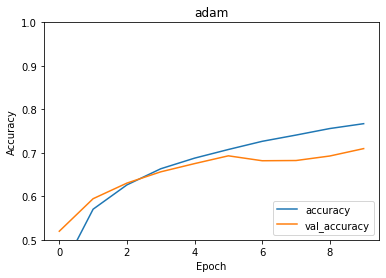

313/313 - 3s - loss: 0.8653 - accuracy: 0.7097
----->Test accuracy for adam : 0.7096999883651733
----->Prediction for: adam
Expected: cat
Guess: cat


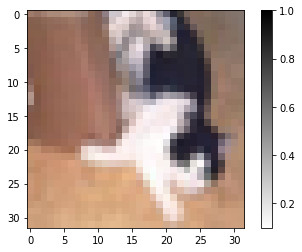

_________________________________________________________________________________________________________________
----->Training the model with: adamax oprimizer
Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 0.5311 - accuracy: 0.8169 - val_loss: 0.8399 - val_accuracy: 0.7209
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.4827 - accuracy: 0.8351 - val_loss: 0.8479 - val_accuracy: 0.7218
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4731 - accuracy: 0.8400 - val_loss: 0.8591 - val_accuracy: 0.7224
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.4497 - accuracy: 0.8447 - val_loss: 0.8832 - val_accuracy: 0.7208
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.4394 - accuracy: 0.8487 - val_loss: 0.8872 - val_accuracy: 0.7209
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.4210 - accuracy: 0.8553 - va

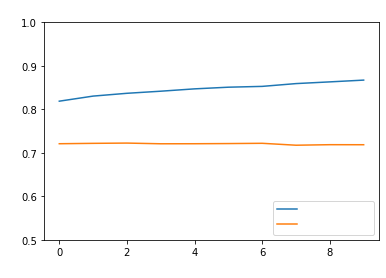

313/313 - 3s - loss: 0.9502 - accuracy: 0.7186
----->Test accuracy for adamax : 0.7185999751091003
----->Prediction for: adamax
Expected: truck
Guess: truck


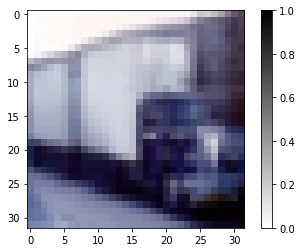

_________________________________________________________________________________________________________________
----->Training the model with: adagrad oprimizer
Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.3389 - accuracy: 0.8903 - val_loss: 0.9423 - val_accuracy: 0.7251
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.3277 - accuracy: 0.8935 - val_loss: 0.9467 - val_accuracy: 0.7248
Epoch 3/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.3358 - accuracy: 0.8931 - val_loss: 0.9508 - val_accuracy: 0.7250
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.3348 - accuracy: 0.8908 - val_loss: 0.9508 - val_accuracy: 0.7242
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.3234 - accuracy: 0.8956 - val_loss: 0.9534 - val_accuracy: 0.7250
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.3204 - accuracy: 0.8976 - v

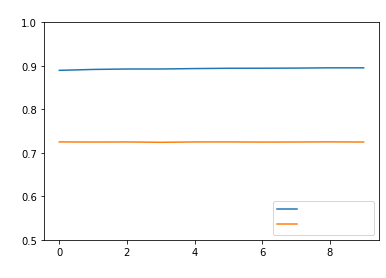

313/313 - 3s - loss: 0.9600 - accuracy: 0.7248
----->Test accuracy for adagrad : 0.7247999906539917
----->Prediction for: adagrad
Expected: frog
Guess: frog


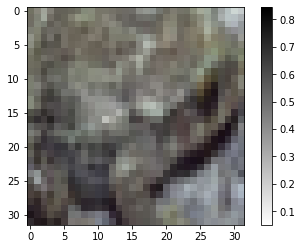

_________________________________________________________________________________________________________________
----->Training the model with: adadelta oprimizer
Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.3228 - accuracy: 0.8957 - val_loss: 0.9600 - val_accuracy: 0.7252
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.3221 - accuracy: 0.8947 - val_loss: 0.9603 - val_accuracy: 0.7252
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.3163 - accuracy: 0.8974 - val_loss: 0.9607 - val_accuracy: 0.7250
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.3163 - accuracy: 0.8979 - val_loss: 0.9608 - val_accuracy: 0.7250
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.3152 - accuracy: 0.8977 - val_loss: 0.9610 - val_accuracy: 0.7251
Epoch 6/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.3242 - accuracy: 0.8949 - 

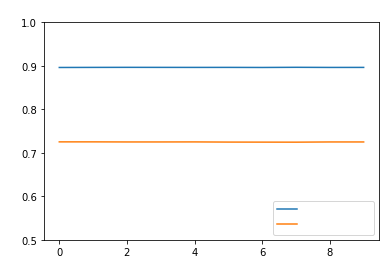

313/313 - 3s - loss: 0.9621 - accuracy: 0.7250
----->Test accuracy for adadelta : 0.7250000238418579
----->Prediction for: adadelta
Expected: airplane
Guess: airplane


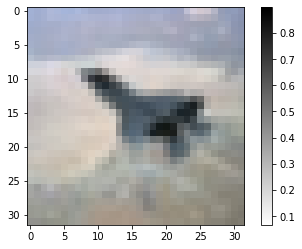

_________________________________________________________________________________________________________________
----->Training the model with: RMSprop oprimizer
Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 0.5231 - accuracy: 0.8151 - val_loss: 1.0078 - val_accuracy: 0.7093
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.5053 - accuracy: 0.8216 - val_loss: 1.0568 - val_accuracy: 0.6912
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4810 - accuracy: 0.8297 - val_loss: 1.1606 - val_accuracy: 0.6738
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4633 - accuracy: 0.8365 - val_loss: 1.0662 - val_accuracy: 0.6924
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.4485 - accuracy: 0.8419 - val_loss: 1.2041 - val_accuracy: 0.6789
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.4368 - accuracy: 0.8467 - v

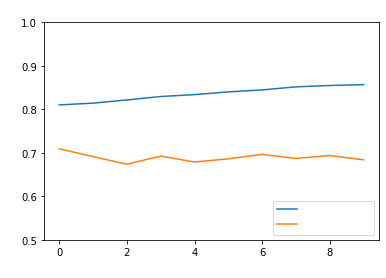

313/313 - 3s - loss: 1.3657 - accuracy: 0.6839
----->Test accuracy for RMSprop : 0.683899998664856
----->Prediction for: RMSprop
Expected: horse
Guess: horse


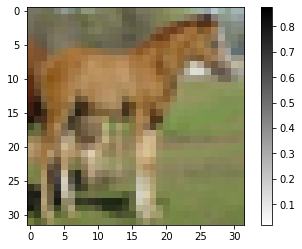

_________________________________________________________________________________________________________________
----->Training the model with: nadam oprimizer
Epoch 1/10
1563/1563 [==============================] - 71s 44ms/step - loss: 0.3535 - accuracy: 0.8776 - val_loss: 1.2414 - val_accuracy: 0.6886
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.3036 - accuracy: 0.8910 - val_loss: 1.3114 - val_accuracy: 0.6892
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.2891 - accuracy: 0.8963 - val_loss: 1.3216 - val_accuracy: 0.6863
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.2729 - accuracy: 0.9036 - val_loss: 1.3778 - val_accuracy: 0.6937
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.2553 - accuracy: 0.9086 - val_loss: 1.4078 - val_accuracy: 0.6926
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.2332 - accuracy: 0.9158 - val

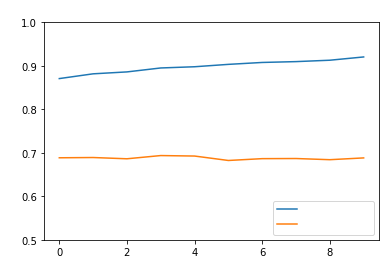

313/313 - 3s - loss: 1.6876 - accuracy: 0.6883
----->Test accuracy for nadam : 0.6883000135421753
----->Prediction for: nadam
Expected: automobile
Guess: automobile


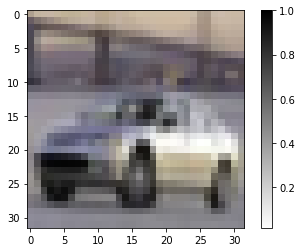

In [20]:
models = compile_model()

In [21]:
# marking the end of the process of the simple model
end_simple_model = date_and_time_now()

Testing the same dataset with different optimizers gave us a broad prospect over different learning curves. The optimizers with the highest test accuracy scores over 70% were <b>adamax, adagrad and adadelta</b> but at the same time, the rest of the optimizers did not score less than 69%, which is not bad at all, as all this was achieved with a few lines of code.

#### Data Augmentation
Forward we are going to try to improve the model with Data Augmentation, which involves making copies of the images in the dataset, with small random modifications [10]. In simple terms, data augmentation involves modifying the pictures from the dataset. This action will expand the training dataset and allow the model to learn the same general features differently. 
There are many data augmentation that could be applied to images, such as [10]:
   1. flip the images 
   2. rotation 
   3. scale
   4. crop
   5. translation
   
Given that our tutorial dataset involves small photos of objects, we need to use data augmentation that does not distort the images too much. Therefore, we will <b>horizontally flip the images, zooming the images, shifting the images' height, and cropping</b> [10].

In the next code section, the data set is populated with the additional "modified" images as specified above. Then, the training process re-starts with the new dataset.

### <b>Note:</b> As the dataset is consistently larger, with the new modified images added, the process of training and testing will be consistently longer.

In [22]:
# marking the start of the process of the data augmentation model
start_DA_model = date_and_time_now()

_________________________________________________________________________________________________________________
----->Training the model with: adam oprimizer
Epoch 1/100
781/781 [==============================] - 81s 102ms/step - loss: 1.0493 - accuracy: 0.6516 - val_loss: 0.9885 - val_accuracy: 0.6710
Epoch 2/100
781/781 [==============================] - 80s 102ms/step - loss: 0.9263 - accuracy: 0.6793 - val_loss: 0.9798 - val_accuracy: 0.6765
Epoch 3/100
781/781 [==============================] - 84s 108ms/step - loss: 0.8785 - accuracy: 0.6953 - val_loss: 0.8793 - val_accuracy: 0.7053
Epoch 4/100
781/781 [==============================] - 82s 104ms/step - loss: 0.8522 - accuracy: 0.7040 - val_loss: 0.8742 - val_accuracy: 0.7060
Epoch 5/100
781/781 [==============================] - 82s 105ms/step - loss: 0.8365 - accuracy: 0.7096 - val_loss: 0.8453 - val_accuracy: 0.7124
Epoch 6/100
781/781 [==============================] - 83s 106ms/step - loss: 0.8067 - accuracy: 0.7193 - val_

Epoch 56/100
781/781 [==============================] - 81s 104ms/step - loss: 0.5505 - accuracy: 0.8070 - val_loss: 0.6831 - val_accuracy: 0.7785
Epoch 57/100
781/781 [==============================] - 81s 104ms/step - loss: 0.5521 - accuracy: 0.8093 - val_loss: 0.6892 - val_accuracy: 0.7826
Epoch 58/100
781/781 [==============================] - 81s 104ms/step - loss: 0.5476 - accuracy: 0.8070 - val_loss: 0.6607 - val_accuracy: 0.7874
Epoch 59/100
781/781 [==============================] - 82s 104ms/step - loss: 0.5503 - accuracy: 0.8068 - val_loss: 0.6558 - val_accuracy: 0.7865
Epoch 60/100
781/781 [==============================] - 82s 104ms/step - loss: 0.5439 - accuracy: 0.8084 - val_loss: 0.6232 - val_accuracy: 0.7932
Epoch 61/100
781/781 [==============================] - 81s 104ms/step - loss: 0.5423 - accuracy: 0.8108 - val_loss: 0.6667 - val_accuracy: 0.7830
Epoch 62/100
781/781 [==============================] - 82s 104ms/step - loss: 0.5469 - accuracy: 0.8081 - val_loss: 0

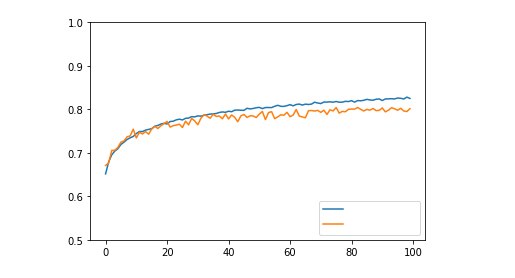

----->Test accuracy for adam : 0.8015999794006348
_________________________________________________________________________________________________________________
----->Training the model with: adamax oprimizer
Epoch 1/100
781/781 [==============================] - 80s 103ms/step - loss: 0.4940 - accuracy: 0.8279 - val_loss: 0.6256 - val_accuracy: 0.8033
Epoch 2/100
781/781 [==============================] - 80s 102ms/step - loss: 0.4936 - accuracy: 0.8271 - val_loss: 0.6091 - val_accuracy: 0.8040
Epoch 3/100
781/781 [==============================] - 80s 103ms/step - loss: 0.4934 - accuracy: 0.8271 - val_loss: 0.5991 - val_accuracy: 0.8064
Epoch 4/100
781/781 [==============================] - 80s 103ms/step - loss: 0.4950 - accuracy: 0.8271 - val_loss: 0.6101 - val_accuracy: 0.8009
Epoch 5/100
781/781 [==============================] - 81s 103ms/step - loss: 0.4916 - accuracy: 0.8294 - val_loss: 0.6263 - val_accuracy: 0.7959
Epoch 6/100
781/781 [==============================] - 81s

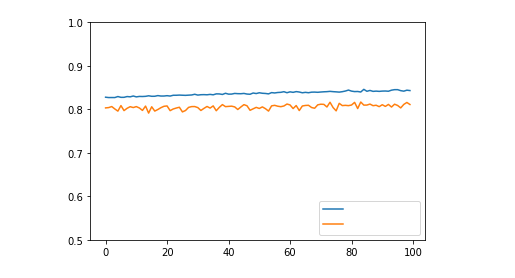

----->Test accuracy for adamax : 0.8111000061035156
_________________________________________________________________________________________________________________
----->Training the model with: adagrad oprimizer
Epoch 1/100
781/781 [==============================] - 80s 102ms/step - loss: 0.4473 - accuracy: 0.8447 - val_loss: 0.6122 - val_accuracy: 0.8120
Epoch 2/100
781/781 [==============================] - 79s 102ms/step - loss: 0.4479 - accuracy: 0.8448 - val_loss: 0.5929 - val_accuracy: 0.8098
Epoch 3/100
781/781 [==============================] - 80s 102ms/step - loss: 0.4416 - accuracy: 0.8473 - val_loss: 0.6101 - val_accuracy: 0.8098
Epoch 4/100
781/781 [==============================] - 80s 102ms/step - loss: 0.4412 - accuracy: 0.8460 - val_loss: 0.6031 - val_accuracy: 0.8119
Epoch 5/100
781/781 [==============================] - 82s 104ms/step - loss: 0.4451 - accuracy: 0.8430 - val_loss: 0.6027 - val_accuracy: 0.8109
Epoch 6/100
781/781 [==============================] - 

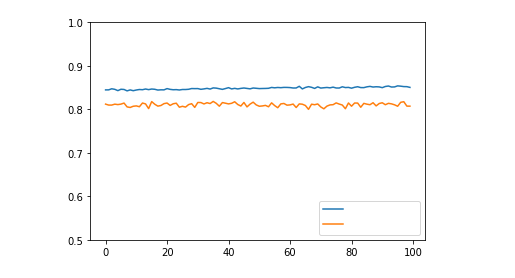

----->Test accuracy for adagrad : 0.8072999715805054
_________________________________________________________________________________________________________________
----->Training the model with: adadelta oprimizer
Epoch 1/100
781/781 [==============================] - 76s 98ms/step - loss: 0.4212 - accuracy: 0.8529 - val_loss: 0.6004 - val_accuracy: 0.8133
Epoch 2/100
781/781 [==============================] - 72s 93ms/step - loss: 0.4222 - accuracy: 0.8523 - val_loss: 0.6252 - val_accuracy: 0.8061
Epoch 3/100
781/781 [==============================] - 70s 90ms/step - loss: 0.4269 - accuracy: 0.8525 - val_loss: 0.6084 - val_accuracy: 0.8085
Epoch 4/100
781/781 [==============================] - 81s 103ms/step - loss: 0.4297 - accuracy: 0.8498 - val_loss: 0.5962 - val_accuracy: 0.8126
Epoch 5/100
781/781 [==============================] - 81s 103ms/step - loss: 0.4276 - accuracy: 0.8520 - val_loss: 0.5857 - val_accuracy: 0.8157
Epoch 6/100
781/781 [==============================] - 8

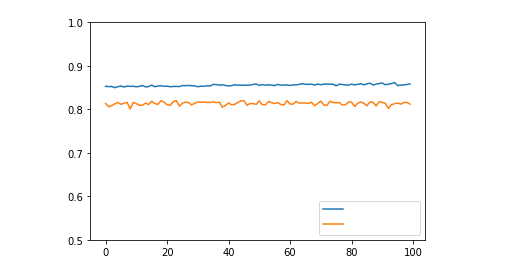

----->Test accuracy for adadelta : 0.8119999766349792
_________________________________________________________________________________________________________________
----->Training the model with: RMSprop oprimizer
Epoch 1/100
781/781 [==============================] - 78s 99ms/step - loss: 0.4044 - accuracy: 0.8589 - val_loss: 0.5948 - val_accuracy: 0.8174
Epoch 2/100
781/781 [==============================] - 77s 98ms/step - loss: 0.4102 - accuracy: 0.8567 - val_loss: 0.5950 - val_accuracy: 0.8143
Epoch 3/100
781/781 [==============================] - 77s 98ms/step - loss: 0.4075 - accuracy: 0.8580 - val_loss: 0.6174 - val_accuracy: 0.8136
Epoch 4/100
781/781 [==============================] - 76s 98ms/step - loss: 0.4065 - accuracy: 0.8593 - val_loss: 0.6242 - val_accuracy: 0.8110
Epoch 5/100
781/781 [==============================] - 76s 97ms/step - loss: 0.4067 - accuracy: 0.8589 - val_loss: 0.5977 - val_accuracy: 0.8145
Epoch 6/100
781/781 [==============================] - 77s

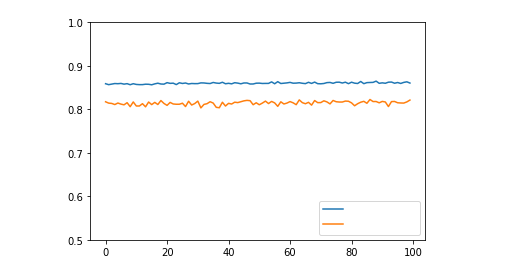

----->Test accuracy for RMSprop : 0.8213000297546387
_________________________________________________________________________________________________________________
----->Training the model with: nadam oprimizer
Epoch 1/100
781/781 [==============================] - 87s 107ms/step - loss: 0.3987 - accuracy: 0.8608 - val_loss: 0.5916 - val_accuracy: 0.8193
Epoch 2/100
781/781 [==============================] - 73s 94ms/step - loss: 0.3954 - accuracy: 0.8623 - val_loss: 0.6246 - val_accuracy: 0.8157
Epoch 3/100
781/781 [==============================] - 73s 94ms/step - loss: 0.3974 - accuracy: 0.8622 - val_loss: 0.6515 - val_accuracy: 0.8019
Epoch 4/100
781/781 [==============================] - 73s 94ms/step - loss: 0.4016 - accuracy: 0.8605 - val_loss: 0.6187 - val_accuracy: 0.8099
Epoch 5/100
781/781 [==============================] - 75s 96ms/step - loss: 0.4006 - accuracy: 0.8608 - val_loss: 0.6225 - val_accuracy: 0.8130
Epoch 6/100
781/781 [==============================] - 73s 9

Epoch 56/100
781/781 [==============================] - 76s 97ms/step - loss: 0.3966 - accuracy: 0.8615 - val_loss: 0.6110 - val_accuracy: 0.8138
Epoch 57/100
781/781 [==============================] - 73s 93ms/step - loss: 0.3939 - accuracy: 0.8630 - val_loss: 0.6038 - val_accuracy: 0.8163
Epoch 58/100
781/781 [==============================] - 73s 93ms/step - loss: 0.3986 - accuracy: 0.8610 - val_loss: 0.5915 - val_accuracy: 0.8202
Epoch 59/100
781/781 [==============================] - 73s 93ms/step - loss: 0.3949 - accuracy: 0.8615 - val_loss: 0.5904 - val_accuracy: 0.8221
Epoch 60/100
781/781 [==============================] - 73s 94ms/step - loss: 0.3957 - accuracy: 0.8631 - val_loss: 0.6248 - val_accuracy: 0.8177
Epoch 61/100
781/781 [==============================] - 73s 93ms/step - loss: 0.3940 - accuracy: 0.8625 - val_loss: 0.6004 - val_accuracy: 0.8185
Epoch 62/100
781/781 [==============================] - 73s 94ms/step - loss: 0.3932 - accuracy: 0.8636 - val_loss: 0.6128 -

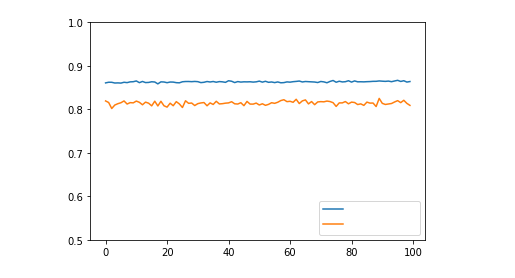

----->Test accuracy for nadam : 0.8090999722480774


In [23]:
from keras.preprocessing.image import ImageDataGenerator

for key in models:
    print("_________________________________________________________________________________________________________________")
    print("----->Training the model with:", key, "oprimizer")
    model = models[key]
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    # prepare iterator
    it_train = datagen.flow(train_images, train_labels, batch_size=64)
    # fit model
    steps = int(train_images.shape[0] / 64)
    history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(test_images, test_labels))
    # evaluate model
    x,acc = model.evaluate(test_images, test_labels, verbose=2)
    # learning curves
    # plot loss
    print("----->Evaluation of the training process for:", key)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.title(model)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()
    print('----->Test accuracy for', key, ':', acc)

In [24]:
# marking the end of the process of the data augmentation model
end_DA_model = date_and_time_now()

In [28]:
# start and end of the process
print("\n\nSTART AND END -> SIMPLE MODEL:")
print("\tStart: \t" , start_simple_model)
print("\tEnd: \t" , end_simple_model)

print("\n\nSTART AND END -> DATA AUGMENTATION MODEL:")
print("\tStart: \t" , start_DA_model)
print("\tEnd: \t" , end_DA_model)



START AND END -> SIMPLE MODEL:
	Start: 	 2021-03-21 15:22:13
	End: 	 2021-03-21 16:32:32


START AND END -> DATA AUGMENTATION MODEL:
	Start: 	 2021-03-21 16:32:33
	End: 	 2021-03-22 05:45:54


As seen above, adding the augmented images to the original dataset increased the training and the testing time exponentially but also increased the model's accuracy by approximately 10%.

#### Comparison:

| Optimizor | Simple Model | Data Augmenation Model |
|-----------|--------------|------------------------|
| ADAM      | 70%          | 80%                    |
| ADAMAX    | 71%          | 81%                    |
| ADAGRAD   | 72%          | 80%                    |
| ADADELTA  | 72%          | 81%                    |
| RMSprop   | 68%          | 82%                    |
| NADAM     | 68%          | 80%                    |

As seen in the table above, the "Simple Model" has a lower accuracy compared with the "Data Augmentation Model". Almost all optimizer's accuracy was increased by 10% if the dataset is augmented before the training process.

Your results may vary depending on the environment and evaluation procedure.

<a id="#decision_tree"> </a>
## Decision tree

In machine learning, decision trees are a form of supervised learning in which data is constantly split according to parameters. Trees contain two different types of entities: nodes (also called branch) and leaves, where leaves are the final outcome, and nodes is where the data splits [13].

If things seem too confusing, look at the image below and answer the questions (questions are nodes or branches), while the final answers are called leaves.
<img src="decision_tree.jpeg" alt="Regression Tree" width="500px"> [11]


However, things do get a little more complicated than this, as there are two types of decision trees:
   1. Classification Trees
   2. Regression Trees
   
#### 1. Classification trees
This type of tree matches the example in the picture where the result is binary: true or false. The result of this type of tree is called <b>categorial</b> [13].

#### 2. Regression trees
Regression trees are used to predict a value. To simplify the idea, think about how prices are formed. The price of a house will depend on different factors, such as area, number of rooms, schools around, square footage, and others [13].
<img src="regression_tree.png" alt="Regression Tree" width="500px"> [12]

Now that the notion of "Decision Tree" is understood, we will go into detail about how they work and when they should be used.
Recursive partitioning is used to build a decision tree. Starting from the root node, the node at the very top of the tree, each node represents a decision that will lead to one of the node children. In our example, the root node is "Work to do?" and depending on the answer (yes or no) the data is redirected to one of the node's children: "Stay in" or "Outlook?". The "Stay in" node is a leaf, meaning that it represents a final outcome, while the "Outlook?" node splits further to other children [11].

When real data is inserted into a decision tree, starting from the root, the data split into one child or another depending on its value. In order to create the nodes that split the data, an objective function is required. This function maximizes the information gain at each node that splits the data [11]. 

All this sounds very fancy and difficult, so further, we will implement the popular IRIS set to get a better understanding of the Decision Trees.

#### Iris Flowers and Biology
Biology? Well, to understand how the Iris Flowers dataset is categorized, we will go over a little bit of biology. 
Iris is a beautiful flower, and if you had never seen one, look at the image below.
<img src="iris.png" alt="Regression Tree" width="500"> [13]

The irises present in the dataset are <b>Iris setosa, Iris virginica, </b>and <b>Iris versicolor</b>. And the record present in the data are the lengths and widths of petals and sepals of these 3 particular kinds of irises (see image below).
<img src="irises.png" alt="Regression Tree" width="500"> [14]

Observing the image above, we can clearly see there are similarities between the different types of flowers, but the objective function calculates the difference between these similarities. If you are interested, you can observe the function in the image below [14],[15]:
<img src="objective_formula.png" alt="Regression Tree" width="500"> [14]


The model we will implement will focus on <b>classification trees</b>, and our goal is to predict each flower from the dataset to which category it belongs. 
The sepal lengths and width in centimeters are stored in columns. These dimensions are called <b>features</b>, and they describe the iris flower.

The code section below, will help you visuzalize

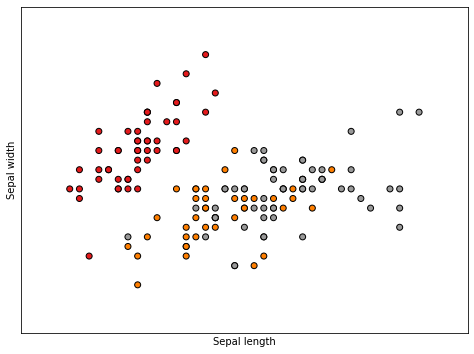

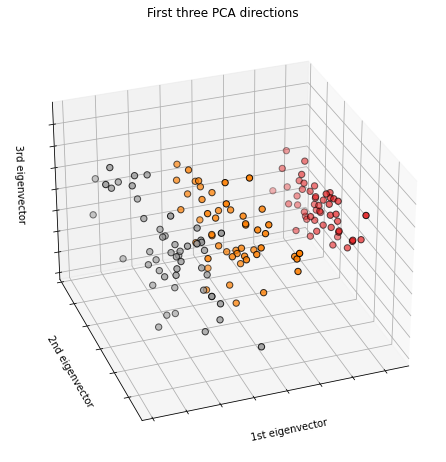

In [3]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

Another way to visualise the data, is to see it in a table.

Now that you had visualized the data, is time to implement the model, train it and test it.

We will use a Decision Tree, as it was mentioned above. The dataset contains three different classes where data needs to be categorised:
   1. setosa 
   2. versicolor
   3. virginica
    
Each flower will have the following features:
   1. sepal length
   2. sepal width
   3. petal length
   4. petal width
   
And again, our goal is to predict the iris flower class, depending on its features.

<i>The following tutorial is based on: [16], [17]</i>

The first step is to import all the necessary libraries needed to achieve our goal.


In [163]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

The sklearn.dataset contains multiple datasets, and the one needed for the model is the iris dataset.

From this dataset, we can extract the classes and the features (data). 
   * to extract classes: data.target_names
   * to extract the features: data.data

In [164]:
#Loading the iris data
iris = datasets.load_iris()
print('Classes to predict: ', iris.target_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']


In [165]:
# extracting data attributes
X = iris.data
# extracting target/ class labels
y = iris.target
print('Number of examples in the data:', data.shape[0])

Number of examples in the data: 150


Now we can visualize all features for each iris.

In [166]:
ir = pd.DataFrame(data)
ir.columns = iris.feature_names
ir['CLASS'] = iris.target
ir.head(7) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0


Until now we had separated the classes and the features. Now it is time to split the data into two different sets:
   1. Training set
   2. Testing set

In [167]:
# using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

We will use the DecisionTreeClassifier function from the sklearn library because we are dealing with a classification problem. We will change the criterion parameter to entropy, which sets the measurement for splitting to information gain.

In [168]:
tree = DecisionTreeClassifier(criterion = 'entropy')

Not is an exciting moment when we train the model with the training dataset. The model will be trained to predict the class of the irises based on their features.

In [169]:
# training the decision tree classifier. 
model = tree.fit(X_train, y_train)

After the model had been trained, we can plot a tree so that we can visualize it. This is very useful to understand better how the decisions are made inside the tree.

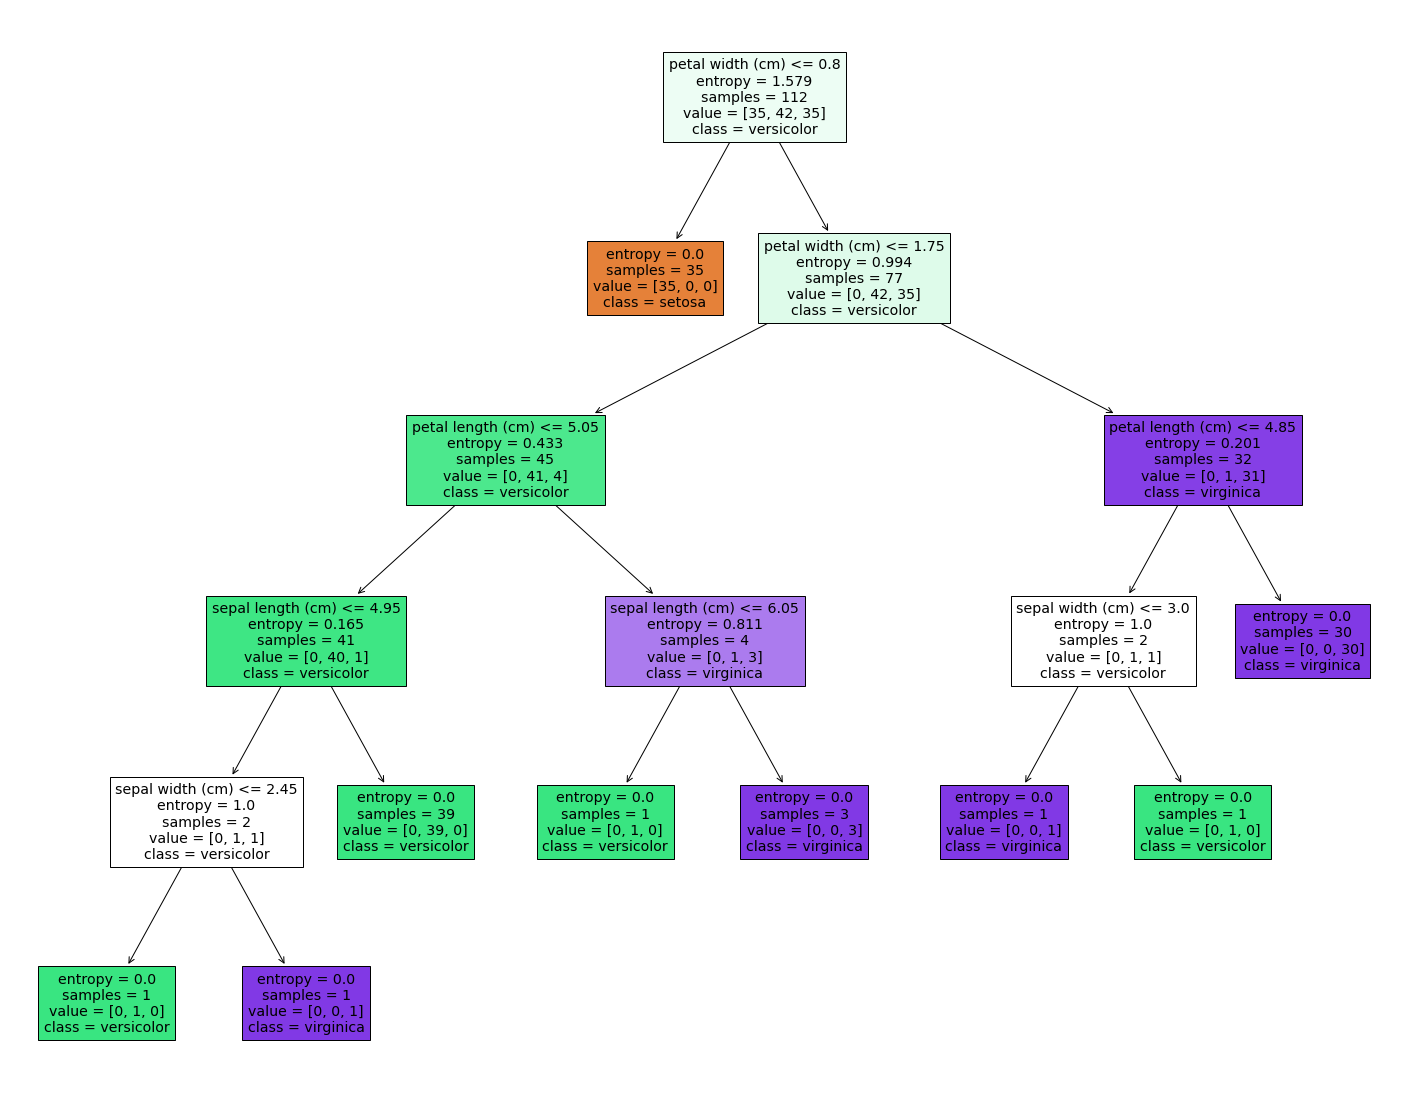

In [170]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

The model is trained; therefore, it is time to test it. We reached the moment when we test the model and see if we achieved our goal.

In [171]:
# predicting labels on the test set.
y_pred =  tree.predict(X_test)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=tree.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9736842105263158


This step is a bonus, as we change the tree's parameters, trying to improve its precision. Even though, 94% is a pretty good accuracy score.
One of those parameters is <b>"min_samples_split"</b> which specifies the minimum number of samples needed to split an internal node. As seen below, the minimum samle split will be 50.

In [172]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', min_samples_split=50)

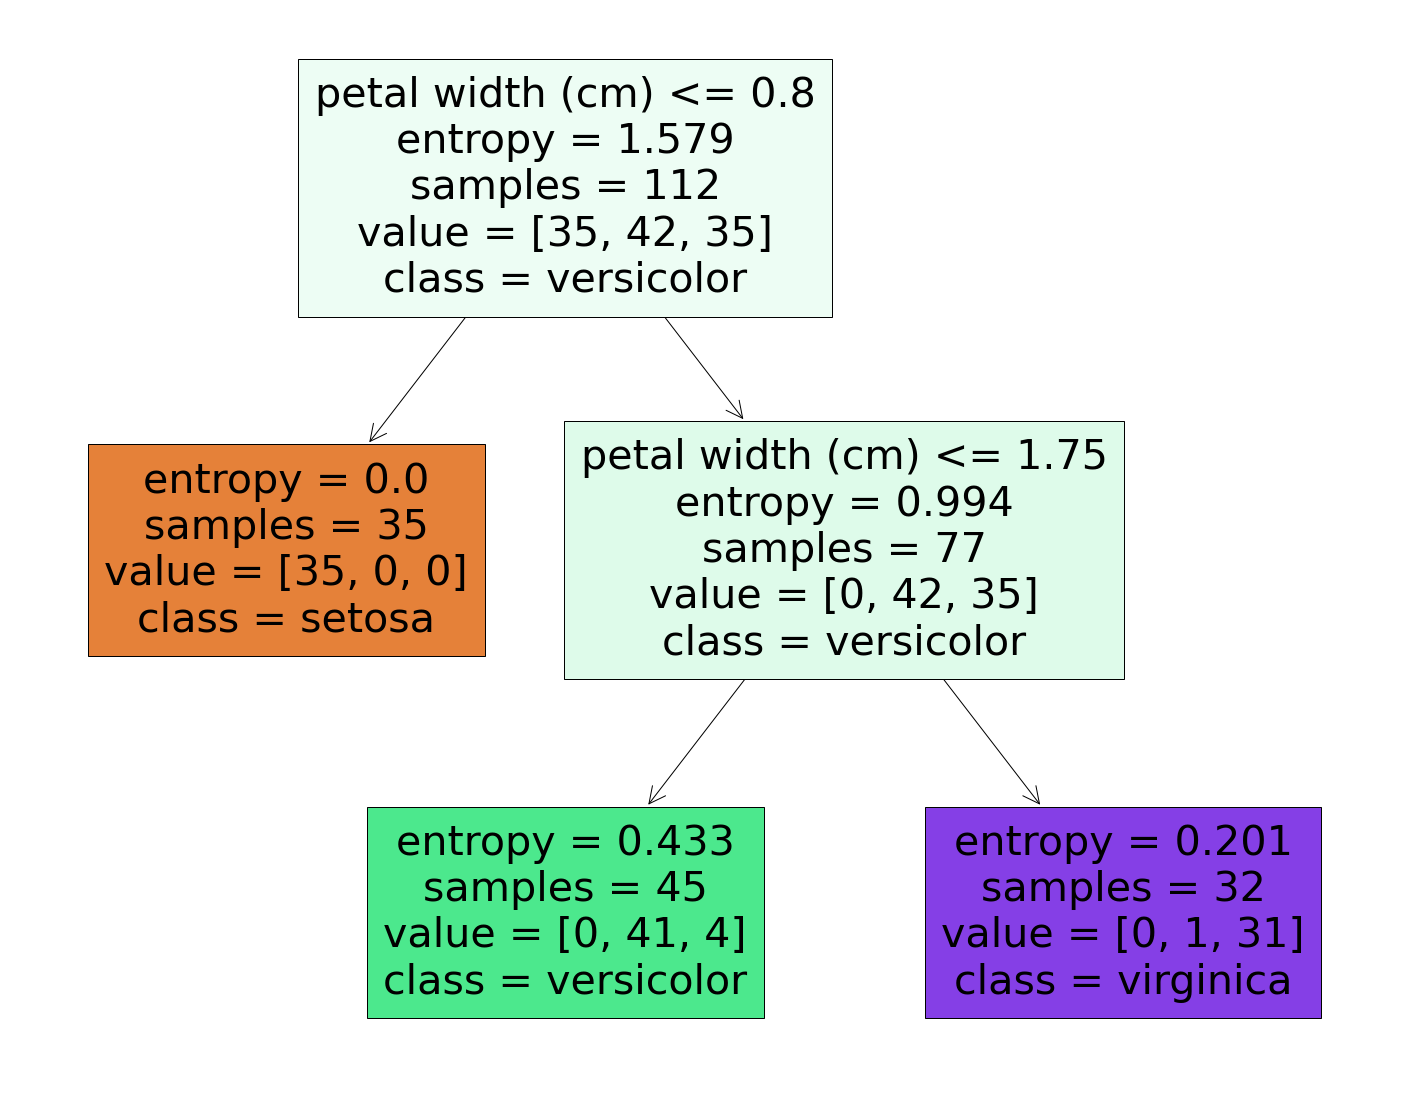

In [173]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [174]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=tree.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=tree.predict(X_test)))

Accuracy Score on train data:  0.9553571428571429
Accuracy Score on the test data:  0.9736842105263158


You can see in the plot above that the size of the tree decreased consistently. Therefore, the training score decreased as well, but the accuracy score increased by 3%, which is correlated with the fact that 'min_samples_split' helps balance the decision boundary and prevents overfitting.

# Conclusion

(needs to be filled)

# References


   1. Jason Brownlee (2017), "How to Handle Missing Data with Python", Available at: https://machinelearningmastery.com/handle-missing-data-python/, (Accessed 10 December 2020)

   2. Tyler Doll, 2018, "LDA Topic Modeling: An Explanation", Available at: https://towardsdatascience.com/lda-topic-modeling-an-explanation-e184c90aadcd, (Accessed 01.01.2021)

   3. Tenserflow (2020), "Convolutional Neural Network (CNN)", Available at: https://www.tensorflow.org/tutorials/images/cnn, (Accessed 05.01.2020)

   4. Theodora Tataru and Liliana O'Sullivan (2020), "4​th​ Year Data Science CA 1- Research Document" Available at: https://instituteoftechnol663-my.sharepoint.com/:b:/g/personal/c00231174_itcarlow_ie/EaPwa2jNdhxEs0FtRfYoPlABahguc5fn0Rd8gf93eeLYEw?e=r3ywIz, (Accessed 05.01.2020)

   5. Douglas Daseeco (2017), “How does AI learn?”, Available at: https://ai.stackexchange.com/questions/3640/how-does-an-ai-learn, (Accessed 05.01.2021)

   6. Matthew Hutson (2018), “How researchers are teaching AI to learn like a child”, Available at: https://www.sciencemag.org/news/2018/05/howresearchers-are-teaching-ai-learn-child, (Accessed 05.01.2021)

   7. Daksh Trehan (2020), "Convolutional Neural Networks", Available at: https://medium.com/towards-artificial-intelligence/convolutional-neural-networks-for-dummies-afd7166cd9e, (Accessed 22.01.2021)

   8. Ben Dickson (2020), "What are convolutional neural networks (CNN)?", Available at: https://bdtechtalks.com/2020/01/06/convolutional-neural-networks-cnn-convnets/, (Accessed 22.01.2021)

   9. Sebastian Ruder (2016), "An overview of gradient descent optimization algorithms", Available at: https://ruder.io/optimizing-gradient-descent/index.html#momentum, (Accessed 27.02.2021)

   10. Arun Gandhi (2021), "Data Augmentation | How to use Deep Learning when you have Limited Data — Part 2", Available at: 
    https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/, (Accessed 19.03.2021)

   11. Loreinne Li (2019), "Classification and Regression Analysis with Decision Trees", Available at https://towardsdatascience.com/https-medium-com-lorrli-classification-and-regression-analysis-with-decision-trees-c43cdbc58054, (Accessed 23.03.2021)

   12. Samet Girgin (2019), "Decision Tree Regression in 6 Steps with Python", Avaialble at https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16, (Accessed 23.03.2021)
   
   13. Oriant (2017), "Decision Trees for Classification: A Machine Learning Algorithm", Avaialble at https://www.xoriant.com/blog/product-engineering/decision-trees-machine-learning-algorithm.html#:~:text=%7C-,Blog,namely%20decision%20nodes%20and%20leaves, (Accessed 24.03.2021)
   
   14. Susan Candelario (2021), "iris flower collage", Available at https://www.flickr.com/photos/susancandelario/50016355531, (Accessed 24.03.2021)
   
   15. Yong Cui (2020), "The Iris Dataset — A Little Bit of History and Biology", Avaialble at https://towardsdatascience.com/the-iris-dataset-a-little-bit-of-history-and-biology-fb4812f5a7b5, (Accessed 24.03.2021)
   
   16. Hackerearth (2021), "Decision Tree", Avialable at https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/, (Accessed 24.03.2021) 
   
   17. Piotr Płoński (2020), "Visualize a Decision Tree in 4 Ways with Scikit-Learn and Python", Available at https://mljar.com/blog/visualize-decision-tree/, (Accessed 24.03.2021)